## Import

In [1]:
import pandas as pd
import random
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

## Data Load

In [5]:
import pandas as pd
import numpy as np


train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [14]:
# to predict Y_Quality

train_x_Q = train_df.drop(columns=['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP'])
train_y_Q = train_df['Y_Quality']
test_x_Q = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])



# to predict Y_Class

train_x = train_df.drop(columns=['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP'])
train_y = train_df['Y_Class']
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

##  Preprcessing

### (1)_fill

In [17]:
# to predict Y_Quality

train_x_Q = train_x_Q.fillna(0)
test_x_Q = test_x_Q.fillna(0)


# to predict Y_Class

train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

### (2)_LableEncorder

In [18]:
# to predict Y_Quality

qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')




# to predict Y_Class

qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x_Q[i])
    train_x_Q[i] = le.transform(train_x_Q[i])
    
    for label in np.unique(test_x_Q[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x_Q[i] = le.transform(test_x_Q[i]) 
print('Done.')

Done.
Done.


## Split train / valid

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, random_state=42, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(478, 2880)
(478,)
(120, 2880)
(120,)


## Classification Model Fit

### ✅Valid

In [13]:
### 나중에 optuna 적용해보기 ###


from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def model_fit_pred(x_train, y_train, x_val, y_val):
    
    ### RandomForestClassifier ###
    RF = RandomForestClassifier(random_state=42).fit(x_train, y_train)
    print('RandomForestClassifier >>>>> Done', '\n\n')
    rf_pred = RF.predict(x_val)
    print(classification_report(y_val, rf_pred))

    ### XGBClassifier ###
    XGB = XGBClassifier(n_estimators=1000, max_depth=2, learning_rate=0.01, objective='multi:softmax').fit(x_train, y_train)
    print('\n\n', 'XGBClassifier >>>>> Done', '\n\n')
    xgb_pred = XGB.predict(x_val)
    print(classification_report(y_val, xgb_pred))   



In [59]:
model_fit_pred(x_train, y_train, x_val, y_val)

RandomForestClassifier >>>>> Done 


              precision    recall  f1-score   support

           0       0.78      0.30      0.44        23
           1       0.72      0.96      0.82        76
           2       0.78      0.33      0.47        21

    accuracy                           0.73       120
   macro avg       0.76      0.53      0.57       120
weighted avg       0.74      0.72      0.68       120

[00:00:21] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 XGBClassifier >>>>> Done 


              precision    recall  f1-score   support

           0       0.86      0.26      0.40        23
           1       0.70      0.96      0.81        76
           2       0.78      0.33  

(array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1]),
 array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
        1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1]))

#### 👉 RandomForestClassifier

In [11]:
### RF ###

RF = RandomForestClassifier(random_state=42).fit(x_train, y_train)
print('Done.')

from sklearn.metrics import classification_report

pred = RF.predict(x_val)
print(classification_report(y_val, pred))

Done.
              precision    recall  f1-score   support

           0       0.78      0.30      0.44        23
           1       0.72      0.96      0.82        76
           2       0.78      0.33      0.47        21

    accuracy                           0.73       120
   macro avg       0.76      0.53      0.57       120
weighted avg       0.74      0.72      0.68       120



In [77]:
classifier_obj = RandomForestClassifier(random_state=42,
                                        max_depth=8,
                                        n_estimators=11,
                                        min_samples_split=5).fit(x_train, y_train)

preds = classifier_obj.predict(x_val)
pred_labels = np.rint(preds)
accuracy = sklearn.metrics.accuracy_score(y_val, pred_labels)
accuracy

0.7333333333333333

##### optuna

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import optuna


n_trials = 2000

def objective_rfc(trial):

    rf_max_depth = trial.suggest_int("max_depth", 2, 8, log=True)
    rf_n_estimators = trial.suggest_int("n_estimators", 1, 500, log=True)
    rf_min_samples_split = trial.suggest_int("min_samples_split", 2, 5, log=True)
    #rf_random_state = trial.suggest_int("random_state", 1, 100, log=True)

    classifier_obj = RandomForestClassifier(random_state=42,
                                            max_depth=rf_max_depth,
                                            n_estimators=rf_n_estimators,
                                            min_samples_split=rf_min_samples_split)

    bst = classifier_obj.fit(x_train, y_train)
    preds = bst.predict(x_val)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_val, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_rfc, n_trials=n_trials, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-02-04 20:11:10,837] A new study created in memory with name: no-name-adcc61ec-1b60-46ca-9509-fc962aa52eaf
[I 2023-02-04 20:11:11,205] Trial 0 finished with value: 0.6833333333333333 and parameters: {'max_depth': 2, 'n_estimators': 303, 'min_samples_split': 2}. Best is trial 0 with value: 0.6833333333333333.
[I 2023-02-04 20:11:11,232] Trial 1 finished with value: 0.6666666666666666 and parameters: {'max_depth': 3, 'n_estimators': 1, 'min_samples_split': 2}. Best is trial 0 with value: 0.6833333333333333.
[I 2023-02-04 20:11:11,265] Trial 2 finished with value: 0.55 and parameters: {'max_depth': 5, 'n_estimators': 2, 'min_samples_split': 3}. Best is trial 0 with value: 0.6833333333333333.
[I 2023-02-04 20:11:11,321] Trial 3 finished with value: 0.725 and parameters: {'max_depth': 8, 'n_estimators': 9, 'min_samples_split': 5}. Best is trial 3 with value: 0.725.
[I 2023-02-04 20:11:11,348] Trial 4 finished with value: 0.6166666666666667 and parameters: {'max_depth': 2, 'n_estimato

Number of finished trials:  2000
Best trial:
  Value: 0.75
  Params: 
    max_depth: 8
    n_estimators: 11
    min_samples_split: 5


###### score

0.75  

Number of finished trials:  100
Best trial:
  Value: 0.775
  Params: 
    rf_max_depth: 12
    n_estimators: 23

#### 🎯 Stubmit

In [85]:
classifier_obj = RandomForestClassifier(random_state=42,
                                        max_depth=8,
                                        n_estimators=11,
                                        min_samples_split=5)

bst = classifier_obj.fit(train_x, train_y)
preds = bst.predict(test_x)
rf_pred = np.rint(preds)

submit = pd.read_csv('./sample_submission.csv')
submit['Y_Class'] = rf_pred
submit.to_csv('./rf_42_optuna_submission.csv', index=False)

#### 👉 XGB

In [ ]:
# xgb (1)

import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dval = xgb.DMatrix(x_val, y_val)

# specify parameters via map
param = {"max_depth": 100, "eta": 1, "objective": "multi:softmax"}

# specify validations set to watch performance
watchlist = [(dval, "eval"), (dtrain, "train")]

# number of boosting rounds
num_round = 2
bst = xgb.train(param, dtrain, num_boost_round=num_round, evals=watchlist)
print('XGBClassifier >>>>> Done', '\n\n')

# run prediction
preds = bst.predict(dval)
labels = dval.get_label()


In [11]:
# xgb (2)

XGB = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=0.01, objective='multi:softmax').fit(x_train, y_train)
print('\n\n', 'XGBClassifier >>>>> Done', '\n\n')
xgb_pred = XGB.predict(x_val)
print(classification_report(y_val, xgb_pred))  

# submit = pd.read_csv('./sample_submission.csv')
# submit['Y_Class'] = xgb_pred
# submit.to_csv('./xgb_submission.csv', index=False)

[09:39:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 XGBClassifier >>>>> Done 


              precision    recall  f1-score   support

           0       0.83      0.22      0.34        23
           1       0.71      0.95      0.81        76
           2       0.67      0.38      0.48        21

    accuracy                           0.71       120
   macro avg       0.74      0.52      0.55       120
weighted avg       0.72      0.71      0.66       120



##### optuna

In [47]:
import pandas as pd
import xgboost as xgb
import sklearn.metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

n_trials = 5000 # <<<<<

# 아래 함수에서 파라미터 조정
def objective_XGB(trial):
    
    dtrain = xgb.DMatrix(x_train, y_train)
    dvalid = xgb.DMatrix(x_val, y_val)

    param = {
        "verbosity": 0,
        
        "objective": "multi:softmax",   # 👈  binary:logistic >> multi:softmax 으로 변경
        "num_class": '3',  # 👈 "objective": "multi:softmax" 일 시 num_class 파라미터 지정해야 해서 추가함
        
        #  https://romg2.github.io/mlguide/03_머신러닝-완벽가이드-04.-분류-XGBoost/  👈 참고사이트


        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 2, 32, log=True)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_val, pred_labels)
    return accuracy

# 아래 함수에서 실행
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_XGB, n_trials=n_trials, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-02-04 12:12:34,505] A new study created in memory with name: no-name-e8689ffb-83bf-44cc-93cb-d5e0e7018e82
[I 2023-02-04 12:12:34,733] Trial 0 finished with value: 0.7083333333333334 and parameters: {'booster': 'gblinear', 'lambda': 0.0008460832664166152, 'alpha': 1.474384133969996e-06, 'subsample': 0.5745203087098282, 'colsample_bytree': 0.720347682454879}. Best is trial 0 with value: 0.7083333333333334.
[I 2023-02-04 12:12:35,197] Trial 1 finished with value: 0.6833333333333333 and parameters: {'booster': 'dart', 'lambda': 1.2355455919076258e-05, 'alpha': 1.4861345788651963e-05, 'subsample': 0.3147168419397044, 'colsample_bytree': 0.8838303390301048, 'max_depth': 6, 'min_child_weight': 8, 'eta': 0.5333675779808008, 'gamma': 0.6157273989877262, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.388250819172249e-08, 'skip_drop': 0.007444371331961654}. Best is trial 0 with value: 0.7083333333333334.
[I 2023-02-04 12:12:35,522] Trial 2

Number of finished trials:  1022
Best trial:
  Value: 0.7916666666666666
  Params: 
    booster: dart
    lambda: 0.2553839284082131
    alpha: 2.963365197931572e-05
    subsample: 0.5476984339603794
    colsample_bytree: 0.5739754370625748
    max_depth: 11
    min_child_weight: 3
    eta: 6.065247920269048e-06
    gamma: 0.7336338498338038
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: forest
    rate_drop: 3.9072533559090704e-07
    skip_drop: 0.00014872786300187534


Number of finished trials:  1022
Best trial:
  Value: 0.7916666666666666
  Params: 
    booster: dart
    lambda: 0.2553839284082131
    alpha: 2.963365197931572e-05
    subsample: 0.5476984339603794
    colsample_bytree: 0.5739754370625748
    max_depth: 11
    min_child_weight: 3
    eta: 6.065247920269048e-06
    gamma: 0.7336338498338038
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: forest
    rate_drop: 3.9072533559090704e-07
    skip_drop: 0.00014872786300187534

In [57]:
#Number of finished trials:  1022
#Best trial:
#  Value: 0.7916666666666666

dtrain = xgb.DMatrix(train_x, train_y)
dvalid = xgb.DMatrix(test_x)

param={'Pbooster': 'dart',
'lambda': 0.2553839284082131,
'alpha': 2.963365197931572e-05,
'subsample': 0.5476984339603794,
'colsample_bytree': 0.5739754370625748,
'max_depth': 11,
'min_child_weight': 3,
'eta': 6.065247920269048e-06,
'gamma': 0.7336338498338038,
'grow_policy': 'lossguide',
'sample_type': 'weighted',
'normalize_type': 'forest',
'rate_drop': 3.9072533559090704e-07,
'skip_drop': 0.00014872786300187534}

bst = xgb.train(param, dtrain)
preds = bst.predict(dvalid)
xgb_optuna_labels = np.rint(preds)
#accuracy = sklearn.metrics.accuracy_score(y_val, xgb_optuna_labels)

In [58]:
submit = pd.read_csv('./sample_submission.csv')
submit['Y_Class'] = xgb_optuna_labels
submit.to_csv('./xgb_optuna_submission.csv', index=False)

### 👉 XGBClassifier

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

XGBClass = XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.01, objective='multi:softmax').fit(x_train, y_train)
print('\n\n', 'XGBClassifier >>>>> Done', '\n\n')
xgb_pred = XGBClass.predict(x_val)

[18:56:15] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 XGBClassifier >>>>> Done 




#### optuna

In [61]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

n_trials = 100

def objective_xgbc(trial):

    xgb_max_depth = trial.suggest_int("rf_max_depth", 2, 10, log=True)
    xgb_n_estimators = trial.suggest_int("n_estimators", 1, 50, log=True)
    xgb_learning_rate = trial.suggest_float("learning_rate", low=0.001, high=0.1, step=0.01)

    classifier_obj = XGBClassifier(max_depth=xgb_max_depth,
                                n_estimators=xgb_n_estimators,
                                learning_rate = xgb_learning_rate,
                                objective='multi:softmax')
    
    bst = classifier_obj.fit(x_train, y_train)
    preds = bst.predict(x_val)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_val, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_xgbc, n_trials=n_trials, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-02-04 19:36:24,793] A new study created in memory with name: no-name-a26b03d7-6777-47fe-92b5-28c53047704d
[I 2023-02-04 19:36:25,023] Trial 0 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 3, 'n_estimators': 3, 'learning_rate': 0.07100000000000001}. Best is trial 0 with value: 0.7083333333333334.


[19:36:24] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:25,678] Trial 1 finished with value: 0.725 and parameters: {'rf_max_depth': 4, 'n_estimators': 12, 'learning_rate': 0.041}. Best is trial 1 with value: 0.725.
[I 2023-02-04 19:36:25,860] Trial 2 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 1, 'learning_rate': 0.061}. Best is trial 2 with value: 0.7333333333333333.


[19:36:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:26,122] Trial 3 finished with value: 0.7 and parameters: {'rf_max_depth': 4, 'n_estimators': 3, 'learning_rate': 0.001}. Best is trial 2 with value: 0.7333333333333333.


[19:36:26] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:28,299] Trial 4 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 24, 'learning_rate': 0.031}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-02-04 19:36:28,594] Trial 5 finished with value: 0.7 and parameters: {'rf_max_depth': 5, 'n_estimators': 2, 'learning_rate': 0.051000000000000004}. Best is trial 2 with value: 0.7333333333333333.


[19:36:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:30,011] Trial 6 finished with value: 0.7 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'learning_rate': 0.011}. Best is trial 2 with value: 0.7333333333333333.


[19:36:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:31,547] Trial 7 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 14, 'learning_rate': 0.091}. Best is trial 2 with value: 0.7333333333333333.


[19:36:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:31,983] Trial 8 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 3, 'n_estimators': 7, 'learning_rate': 0.061}. Best is trial 2 with value: 0.7333333333333333.


[19:36:32] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:32,814] Trial 9 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 10, 'learning_rate': 0.001}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-02-04 19:36:32,927] Trial 10 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 2, 'n_estimators': 1, 'learning_rate': 0.091}. Best is trial 2 with value: 0.7333333333333333.


[19:36:32] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:33] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:36,752] Trial 11 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 10, 'n_estimators': 35, 'learning_rate': 0.031}. Best is trial 2 with value: 0.7333333333333333.
[I 2023-02-04 19:36:36,952] Trial 12 finished with value: 0.7416666666666667 and parameters: {'rf_max_depth': 7, 'n_estimators': 1, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:36:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:37,170] Trial 13 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 1, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:36:37] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:37,366] Trial 14 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 10, 'n_estimators': 1, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:36:37] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:37] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:37,598] Trial 15 finished with value: 0.7 and parameters: {'rf_max_depth': 5, 'n_estimators': 2, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.
[I 2023-02-04 19:36:37,851] Trial 16 finished with value: 0.725 and parameters: {'rf_max_depth': 8, 'n_estimators': 2, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:36:37] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:38,131] Trial 17 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 3, 'n_estimators': 4, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:36:37] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:38,379] Trial 18 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 2, 'n_estimators': 1, 'learning_rate': 0.041}. Best is trial 12 with value: 0.7416666666666667.


[19:36:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:38,971] Trial 19 finished with value: 0.725 and parameters: {'rf_max_depth': 8, 'n_estimators': 6, 'learning_rate': 0.001}. Best is trial 12 with value: 0.7416666666666667.


[19:36:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:39,709] Trial 20 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 6, 'n_estimators': 9, 'learning_rate': 0.011}. Best is trial 12 with value: 0.7416666666666667.


[19:36:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:43,061] Trial 21 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 48, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:36:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:46,433] Trial 22 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 47, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:36:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:49,965] Trial 23 finished with value: 0.6916666666666667 and parameters: {'rf_max_depth': 10, 'n_estimators': 33, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.
[I 2023-02-04 19:36:50,295] Trial 24 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 9, 'n_estimators': 2, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:36:50] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:50,487] Trial 25 finished with value: 0.7416666666666667 and parameters: {'rf_max_depth': 7, 'n_estimators': 1, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:36:50] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:50] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:50,664] Trial 26 finished with value: 0.7416666666666667 and parameters: {'rf_max_depth': 7, 'n_estimators': 1, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.
[I 2023-02-04 19:36:51,111] Trial 27 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 7, 'n_estimators': 3, 'learning_rate': 0.081}. Best is trial 12 with value: 0.7416666666666667.


[19:36:50] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:51] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:51,469] Trial 28 finished with value: 0.6833333333333333 and parameters: {'rf_max_depth': 5, 'n_estimators': 4, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:36:51] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:51,858] Trial 29 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 7, 'n_estimators': 3, 'learning_rate': 0.081}. Best is trial 12 with value: 0.7416666666666667.
[I 2023-02-04 19:36:52,227] Trial 30 finished with value: 0.7 and parameters: {'rf_max_depth': 9, 'n_estimators': 2, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:36:52] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:52,425] Trial 31 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 9, 'n_estimators': 1, 'learning_rate': 0.041}. Best is trial 12 with value: 0.7416666666666667.


[19:36:52] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:52] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:53,699] Trial 32 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 16, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:36:53] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:54,052] Trial 33 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 4, 'n_estimators': 4, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:36:54] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:57,560] Trial 34 finished with value: 0.725 and parameters: {'rf_max_depth': 8, 'n_estimators': 50, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:36:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:59,117] Trial 35 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 7, 'n_estimators': 23, 'learning_rate': 0.041}. Best is trial 12 with value: 0.7416666666666667.
[I 2023-02-04 19:36:59,297] Trial 36 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 5, 'n_estimators': 1, 'learning_rate': 0.011}. Best is trial 12 with value: 0.7416666666666667.


[19:36:59] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:59,490] Trial 37 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 1, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:36:59] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:59] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:36:59,697] Trial 38 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 7, 'n_estimators': 2, 'learning_rate': 0.081}. Best is trial 12 with value: 0.7416666666666667.
[I 2023-02-04 19:37:00,093] Trial 39 finished with value: 0.725 and parameters: {'rf_max_depth': 8, 'n_estimators': 3, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:36:59] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:00,229] Trial 40 finished with value: 0.7 and parameters: {'rf_max_depth': 4, 'n_estimators': 1, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:00,982] Trial 41 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 11, 'learning_rate': 0.001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:01] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:01,748] Trial 42 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 7, 'n_estimators': 11, 'learning_rate': 0.011}. Best is trial 12 with value: 0.7416666666666667.


[19:37:01] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:04,003] Trial 43 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 39, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:37:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:05,845] Trial 44 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 9, 'n_estimators': 24, 'learning_rate': 0.001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:07,730] Trial 45 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 34, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:37:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:10,733] Trial 46 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 42, 'learning_rate': 0.041}. Best is trial 12 with value: 0.7416666666666667.


[19:37:10] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:11,431] Trial 47 finished with value: 0.725 and parameters: {'rf_max_depth': 9, 'n_estimators': 8, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:37:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:12,075] Trial 48 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 5, 'n_estimators': 13, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:12] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:13,472] Trial 49 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 25, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:13] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:15,558] Trial 50 finished with value: 0.725 and parameters: {'rf_max_depth': 8, 'n_estimators': 26, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:15] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:16,451] Trial 51 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 6, 'n_estimators': 14, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:16] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:17,453] Trial 52 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:17] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:19,446] Trial 53 finished with value: 0.725 and parameters: {'rf_max_depth': 7, 'n_estimators': 29, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:37:19] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:20,432] Trial 54 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 5, 'n_estimators': 17, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:22,963] Trial 55 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 45, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:24,368] Trial 56 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 4, 'n_estimators': 36, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:37:24] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:24,814] Trial 57 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 6, 'learning_rate': 0.011}. Best is trial 12 with value: 0.7416666666666667.


[19:37:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:25,626] Trial 58 finished with value: 0.7 and parameters: {'rf_max_depth': 10, 'n_estimators': 8, 'learning_rate': 0.011}. Best is trial 12 with value: 0.7416666666666667.


[19:37:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:27,610] Trial 59 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 35, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:37:27] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:28,927] Trial 60 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 19, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:29] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:30,025] Trial 61 finished with value: 0.725 and parameters: {'rf_max_depth': 7, 'n_estimators': 16, 'learning_rate': 0.081}. Best is trial 12 with value: 0.7416666666666667.


[19:37:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:31,427] Trial 62 finished with value: 0.725 and parameters: {'rf_max_depth': 7, 'n_estimators': 22, 'learning_rate': 0.041}. Best is trial 12 with value: 0.7416666666666667.


[19:37:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:31,748] Trial 63 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:33,447] Trial 64 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 30, 'learning_rate': 0.001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:33] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:36,087] Trial 65 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 47, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:38,536] Trial 66 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 43, 'learning_rate': 0.091}. Best is trial 12 with value: 0.7416666666666667.


[19:37:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:39,507] Trial 67 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 5, 'n_estimators': 20, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:40,427] Trial 68 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 8, 'n_estimators': 13, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:41,140] Trial 69 finished with value: 0.725 and parameters: {'rf_max_depth': 8, 'n_estimators': 9, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:41] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:41,859] Trial 70 finished with value: 0.725 and parameters: {'rf_max_depth': 5, 'n_estimators': 15, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:41] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:44,235] Trial 71 finished with value: 0.725 and parameters: {'rf_max_depth': 7, 'n_estimators': 39, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:37:44] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:45,856] Trial 72 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 29, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:45] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:47,383] Trial 73 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 27, 'learning_rate': 0.041}. Best is trial 12 with value: 0.7416666666666667.
[I 2023-02-04 19:37:47,549] Trial 74 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 9, 'n_estimators': 1, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:37:47] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:47] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:48,354] Trial 75 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 12, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:48,879] Trial 76 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 6, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:49,595] Trial 77 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 11, 'learning_rate': 0.001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:51,095] Trial 78 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 21, 'learning_rate': 0.07100000000000001}. Best is trial 12 with value: 0.7416666666666667.


[19:37:51] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:51,984] Trial 79 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 9, 'n_estimators': 10, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:52] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:52,658] Trial 80 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 3, 'n_estimators': 19, 'learning_rate': 0.051000000000000004}. Best is trial 12 with value: 0.7416666666666667.


[19:37:52] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:55,122] Trial 81 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 7, 'n_estimators': 38, 'learning_rate': 0.061}. Best is trial 12 with value: 0.7416666666666667.


[19:37:55] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:56,066] Trial 82 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 13, 'learning_rate': 0.041}. Best is trial 12 with value: 0.7416666666666667.


[19:37:56] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:57,790] Trial 83 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 6, 'n_estimators': 32, 'learning_rate': 0.011}. Best is trial 12 with value: 0.7416666666666667.


[19:37:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:37:59,860] Trial 84 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 39, 'learning_rate': 0.021}. Best is trial 12 with value: 0.7416666666666667.


[19:38:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:00,646] Trial 85 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 7, 'n_estimators': 11, 'learning_rate': 0.031}. Best is trial 12 with value: 0.7416666666666667.


[19:38:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:01,807] Trial 86 finished with value: 0.75 and parameters: {'rf_max_depth': 7, 'n_estimators': 18, 'learning_rate': 0.051000000000000004}. Best is trial 86 with value: 0.75.


[19:38:01] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:02,819] Trial 87 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 16, 'learning_rate': 0.051000000000000004}. Best is trial 86 with value: 0.75.


[19:38:02] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:03,879] Trial 88 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 17, 'learning_rate': 0.061}. Best is trial 86 with value: 0.75.


[19:38:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:05,978] Trial 89 finished with value: 0.7083333333333334 and parameters: {'rf_max_depth': 9, 'n_estimators': 27, 'learning_rate': 0.061}. Best is trial 86 with value: 0.75.


[19:38:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:06,355] Trial 90 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 5, 'learning_rate': 0.011}. Best is trial 86 with value: 0.75.


[19:38:06] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:07,785] Trial 91 finished with value: 0.725 and parameters: {'rf_max_depth': 6, 'n_estimators': 25, 'learning_rate': 0.031}. Best is trial 86 with value: 0.75.


[19:38:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:08,761] Trial 92 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 5, 'n_estimators': 21, 'learning_rate': 0.051000000000000004}. Best is trial 86 with value: 0.75.


[19:38:08] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:09,698] Trial 93 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 8, 'n_estimators': 13, 'learning_rate': 0.051000000000000004}. Best is trial 86 with value: 0.75.


[19:38:09] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:13,151] Trial 94 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 47, 'learning_rate': 0.041}. Best is trial 86 with value: 0.75.


[19:38:13] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:14,430] Trial 95 finished with value: 0.7 and parameters: {'rf_max_depth': 10, 'n_estimators': 14, 'learning_rate': 0.061}. Best is trial 86 with value: 0.75.


[19:38:14] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:15,682] Trial 96 finished with value: 0.725 and parameters: {'rf_max_depth': 7, 'n_estimators': 16, 'learning_rate': 0.081}. Best is trial 86 with value: 0.75.


[19:38:15] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:16,543] Trial 97 finished with value: 0.7333333333333333 and parameters: {'rf_max_depth': 7, 'n_estimators': 11, 'learning_rate': 0.001}. Best is trial 86 with value: 0.75.


[19:38:16] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:17,768] Trial 98 finished with value: 0.7416666666666667 and parameters: {'rf_max_depth': 7, 'n_estimators': 18, 'learning_rate': 0.061}. Best is trial 86 with value: 0.75.


[19:38:17] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-02-04 19:38:19,108] Trial 99 finished with value: 0.7166666666666667 and parameters: {'rf_max_depth': 8, 'n_estimators': 18, 'learning_rate': 0.07100000000000001}. Best is trial 86 with value: 0.75.


Number of finished trials:  100
Best trial:
  Value: 0.75
  Params: 
    rf_max_depth: 7
    n_estimators: 18
    learning_rate: 0.051000000000000004


0.75  

Number of finished trials:  100
Best trial:
  Value: 0.75
  Params: 
    rf_max_depth: 7
    n_estimators: 18
    learning_rate: 0.051000000000000004

#### feature importance : 의미 X

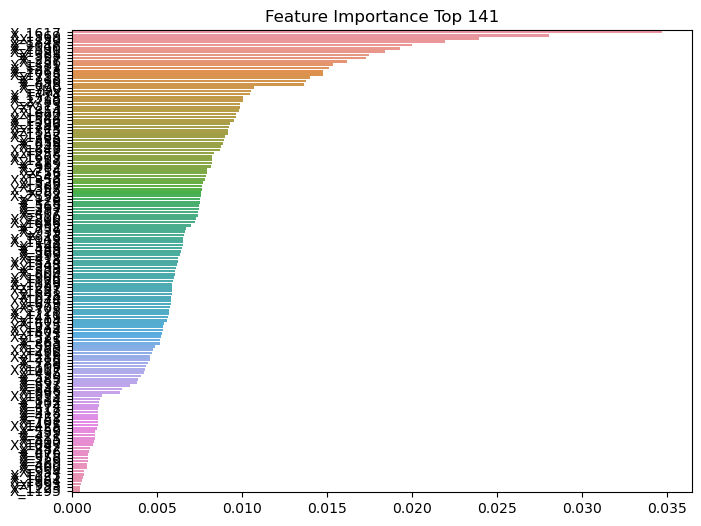

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

ft_importance_values = XGBClassifier.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = train_x.columns)
ft_top141 = ft_series.sort_values(ascending=False)[:141]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 141')
sns.barplot(x=ft_top141, y=ft_top141.index)
plt.show()

In [42]:
fi_col_top141 = ft_top141.index.tolist()

x_train_fi = x_train[fi_col_top141]
x_val_fi = x_val[fi_col_top141]

In [47]:
XGBClass = XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.01, objective='multi:softmax').fit(x_train, y_train)
print('\n\n', 'XGBClassifier : origin >>>>> Done', '\n\n')
xgb_pred = XGBClass.predict(x_val)
print(classification_report(xgb_pred, y_val))

XGBClass_fi = XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.01, objective='multi:softmax').fit(x_train_fi, y_train)
print('\n\n', 'XGBClassifier : feature importance >>>>> Done', '\n\n')
xgb_pred = XGBClass_fi.predict(x_val_fi)
print(classification_report(xgb_pred, y_val))

[16:25:01] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 XGBClassifier : origin >>>>> Done 


              precision    recall  f1-score   support

           0       0.26      0.86      0.40         7
           1       0.96      0.70      0.81       104
           2       0.33      0.78      0.47         9

    accuracy                           0.72       120
   macro avg       0.52      0.78      0.56       120
weighted avg       0.87      0.72      0.76       120

[16:25:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective '

### ✅Test

In [14]:


XGB = XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.01, objective='multi:softmax').fit(train_x, train_y)
print('\n\n', 'XGBClassifier >>>>> Done', '\n\n')
xgb_pred = XGB.predict(test_x)

[16:10:53] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_4f_b8pp6bp/croot/xgboost-split_1675119661934/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 XGBClassifier >>>>> Done 




In [63]:
submit = pd.read_csv('./sample_submission.csv')
submit['Y_Class'] = xgb_pred
submit.to_csv('./xgb_submission.csv', index=False)

## Inference

In [ ]:
preds = RF.predict(test_x)
print('Done.')

Done.


## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

submit['Y_Class'] = preds

submit.to_csv('./baseline_submission.csv', index=False)